**1.Import Libraries**

In [1]:
import numpy as np #Linear algebra
import pandas as pd #Data-processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Visualization
from matplotlib.pyplot import figure #Figure-size
import os
print(os.listdir("../input/voicegender"))
import warnings
warnings.filterwarnings('ignore')
# Read file
voice=pd.read_csv('../input/voicegender/voice.csv')
voice.head()

['voice.csv']


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [2]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.9+ KB


In [3]:
voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [4]:
voice.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


**2.Preprocessing: Label-Encoder and Normalization**

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
voice["label"] = le.fit_transform(voice["label"])
le.classes_

array(['female', 'male'], dtype=object)

In [6]:
voice[:]=preprocessing.MinMaxScaler().fit_transform(voice)
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,...,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1.0
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,...,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1.0
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,...,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1.0
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,...,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1.0
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,...,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1.0


**3.Visualizatio of M & F Ratio**

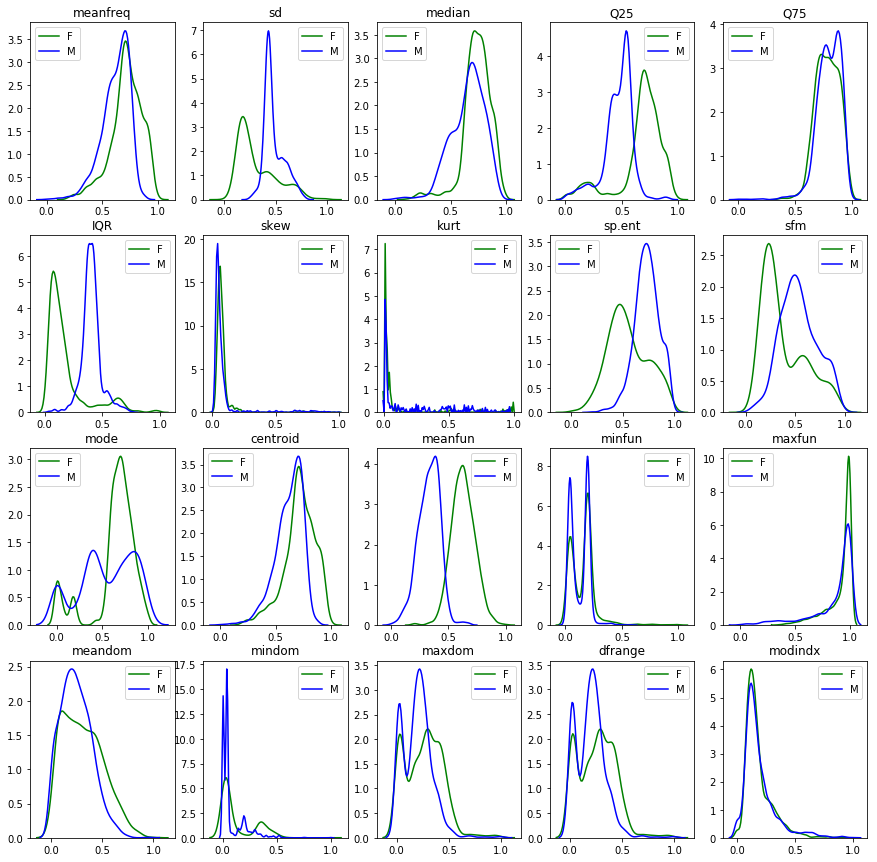

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(4,5,figsize=(15,15))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(voice.columns[i-1])
    sns.kdeplot(voice.loc[voice['label'] == 0, voice.columns[i-1]], color= 'green', label='F')
    sns.kdeplot(voice.loc[voice['label'] == 1, voice.columns[i-1]], color= 'blue', label='M')

Most significant features are Q25, IQR and meanfun. We will build models by using the 20 features and the 3 distinct features using K-Nearest Neighbors, Naive Bayes, Decision Tree, Random Forest, XgBoost, Support Vector Machine, Three-Layer Neural Network to build models.

In [8]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
import xgboost

In [9]:
# Split the data
train, test = train_test_split(voice, test_size=0.3)

In [10]:
train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
399,0.673116,0.456473,0.649879,0.541686,0.874486,0.403457,0.034605,0.002068,0.806891,0.604968,...,0.673116,0.355514,0.165818,0.712861,0.186771,0.006452,0.197641,0.197783,0.098825,1.0
659,0.527993,0.590320,0.580390,0.410266,0.755840,0.425023,0.040862,0.002751,0.876860,0.787096,...,0.527993,0.317140,0.077357,0.626292,0.098244,0.006452,0.036097,0.036123,0.374619,1.0
2164,0.688311,0.240166,0.696992,0.701778,0.722607,0.089685,0.081049,0.008837,0.481122,0.333361,...,0.688311,0.733000,0.521526,0.880415,0.165968,0.092473,0.303431,0.301860,0.109223,0.0
1713,0.925507,0.449779,0.975249,0.973245,0.967970,0.045412,0.077316,0.006406,0.386394,0.261665,...,0.925507,0.845591,0.038234,0.981526,0.194032,0.023656,0.251251,0.251073,0.142851,0.0
2566,0.867737,0.119228,0.861033,0.830811,0.853547,0.082525,0.054149,0.003318,0.344240,0.131317,...,0.867737,0.679378,0.201766,0.990585,0.297456,0.453763,0.179771,0.170601,0.116999,0.0


In [11]:
x_train = train.iloc[:, :-1]
y_train = train["label"]
x_test = test.iloc[:, :-1]
y_test = test["label"]

In [12]:
x_train3 = train[["meanfun","IQR","Q25"]]
y_train3 = train["label"]
x_test3 = test[["meanfun","IQR","Q25"]]
y_test3 = test["label"]

In [13]:
y = voice.label.values
x_data = voice.drop(["label"],axis=1)
x = (x_data - np.min(x_data)) / (np.max(x_data)).values

In [14]:
def classify(model,x_train,y_train,x_test,y_test):
    from sklearn.metrics import classification_report
    target_names = ['female', 'male']
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

# K-Nearest Neighbors
**Using neighbours.KNeighborsClassifier() to build the model.**

In [16]:
def knn_error(k,x_train,y_train,x_test,y_test):
    error_rate = []
    K=range(1,k)
    for i in K:
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at k=%s." % (error_rate[kloc], K[kloc]))

    plt.plot(K, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    return K[kloc]

Lowest error is 0.015772870662460567 occurs at k=8.


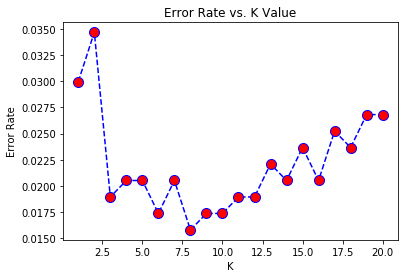

In [17]:
k=knn_error(21,x_train,y_train,x_test,y_test)

In [18]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9832    0.9832    0.9832       297
        male     0.9852    0.9852    0.9852       337

    accuracy                         0.9842       634
   macro avg     0.9842    0.9842    0.9842       634
weighted avg     0.9842    0.9842    0.9842       634



Lowest error is 0.029442691903259727 occurs at k=13.


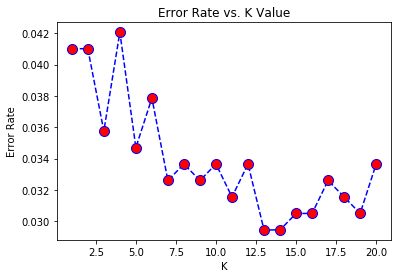

In [19]:
k=knn_error(21,x_train3,y_train3,x_test3,y_test3)

In [20]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9829    0.9697    0.9763       297
        male     0.9736    0.9852    0.9794       337

    accuracy                         0.9779       634
   macro avg     0.9783    0.9774    0.9778       634
weighted avg     0.9780    0.9779    0.9779       634



**Naive Bayes**

Using naive_bayes.GaussianNB() to build the model.

In [21]:
model=naive_bayes.GaussianNB()
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.8970    0.9091    0.9030       297
        male     0.9189    0.9080    0.9134       337

    accuracy                         0.9085       634
   macro avg     0.9080    0.9086    0.9082       634
weighted avg     0.9087    0.9085    0.9086       634



In [22]:
model=naive_bayes.GaussianNB()
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9787    0.9643    0.9714       476
        male     0.9647    0.9789    0.9718       475

    accuracy                         0.9716       951
   macro avg     0.9717    0.9716    0.9716       951
weighted avg     0.9717    0.9716    0.9716       951



**Decision Tree**

Using tree.DecisionTreeClassifier() to build the model.

In [23]:
#Find the best parameter to prune the tree
def dt_error(n,x_train,y_train,x_test,y_test):
    nodes = range(2, n)
    error_rate = []
    for k in nodes:
        model = tree.DecisionTreeClassifier(max_leaf_nodes=k)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[kloc], nodes[kloc]))
    plt.plot(nodes, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.xlabel('Tree Size')
    plt.ylabel('Cross-Validated MSE')
    plt.show()
    return nodes[kloc]

Lowest error is 0.026813880126182965 occurs at n=7.


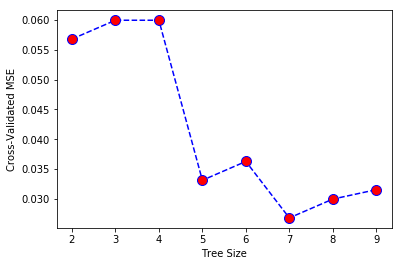

In [24]:
n=dt_error(10,x_train,y_train,x_test,y_test)

In [25]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
classify(pruned_tree,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9636    0.9798    0.9716       297
        male     0.9819    0.9674    0.9746       337

    accuracy                         0.9732       634
   macro avg     0.9728    0.9736    0.9731       634
weighted avg     0.9733    0.9732    0.9732       634



Lowest error is 0.031545741324921134 occurs at n=14.


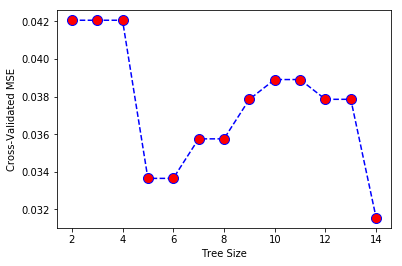

In [26]:
n=dt_error(15,x_train3,y_train3,x_test3,y_test3)

In [27]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
classify(pruned_tree,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9588    0.9790    0.9688       476
        male     0.9785    0.9579    0.9681       475

    accuracy                         0.9685       951
   macro avg     0.9687    0.9684    0.9685       951
weighted avg     0.9687    0.9685    0.9685       951



**Random Forest**

Using ensemble.RandomForestClassifier() to build the model.

In [28]:
def rf_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    e=range(1,n,20)
    for i in e:
        model = ensemble.RandomForestClassifier(n_estimators = i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    nloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[nloc], e[nloc]))

    plt.plot(e, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. n Value')
    plt.xlabel('n')
    plt.ylabel('Error Rate')
    plt.show()
    return e[nloc]

Lowest error is 0.017350157728706624 occurs at n=81.


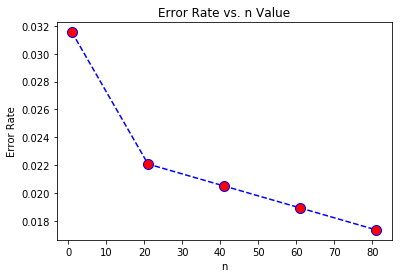

In [29]:
e=rf_error(100,x_train,y_train,x_test,y_test)

In [30]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9704    0.9933    0.9817       297
        male     0.9939    0.9733    0.9835       337

    accuracy                         0.9826       634
   macro avg     0.9822    0.9833    0.9826       634
weighted avg     0.9829    0.9826    0.9827       634



Lowest error is 0.030494216614090432 occurs at n=61.


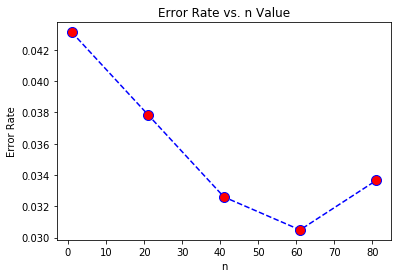

In [31]:
e=rf_error(100,x_train3,y_train3,x_test3,y_test3)

In [32]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9568    0.9769    0.9667       476
        male     0.9763    0.9558    0.9660       475

    accuracy                         0.9664       951
   macro avg     0.9666    0.9663    0.9663       951
weighted avg     0.9666    0.9664    0.9663       951



**XgBoost**

Using xgboost.XGBClassifier() to build the model.

In [33]:
model = xgboost.XGBClassifier()
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9767    0.9899    0.9833       297
        male     0.9910    0.9792    0.9851       337

    accuracy                         0.9842       634
   macro avg     0.9839    0.9846    0.9842       634
weighted avg     0.9843    0.9842    0.9842       634



In [34]:
model = xgboost.XGBClassifier()
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9667    0.9748    0.9707       476
        male     0.9745    0.9663    0.9704       475

    accuracy                         0.9706       951
   macro avg     0.9706    0.9706    0.9706       951
weighted avg     0.9706    0.9706    0.9706       951



**Support Vector Machine**

Using svm.SVC() to build the model.

In [35]:
def svm_kernel(x_train,y_train,x_test,y_test):
    rate=[]
    kernel=['rbf','poly','linear']
    for i in kernel:
        model=svm.SVC(kernel=i).fit(x_train,y_train)
        y_pred=model.predict(x_train)
        print(i, ' in-sample accuracy in SVM: ', accuracy_score(y_train,y_pred))
        y_pred=model.predict(x_test)
        print(i, ' out-of-sample accuracy in SVM: ', accuracy_score(y_test,y_pred))
        rate.append(accuracy_score(y_test,y_pred))
    nloc = rate.index(max(rate))
    print("Highest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [36]:
def svm_error(k,C,x_train,y_train,x_test,y_test):
    error_rate = []
    C=range(1,C)
    for i in C:
        model=svm.SVC(kernel=k,C=i).fit(x_train,y_train)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    cloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[cloc], C[cloc]))

    plt.plot(C, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. C Value')
    plt.xlabel('C')
    plt.ylabel('Error Rate')
    plt.show()
    return C[cloc]

In [37]:
k=svm_kernel(x_train,y_train,x_test,y_test)

rbf  in-sample accuracy in SVM:  0.9660615627466457
rbf  out-of-sample accuracy in SVM:  0.9794952681388013
poly  in-sample accuracy in SVM:  0.8792423046566693
poly  out-of-sample accuracy in SVM:  0.8990536277602523
linear  in-sample accuracy in SVM:  0.9743488555643252
linear  out-of-sample accuracy in SVM:  0.9810725552050473
Highest accuracy is 0.9810725552050473 occurs at linear kernel.


Lowest error is 0.01892744479495268 occurs at C=1.


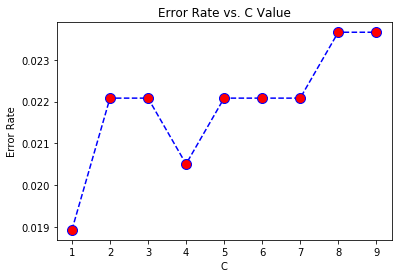

In [38]:
c=svm_error(k,10,x_train,y_train,x_test,y_test)

In [39]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9734    0.9865    0.9799       297
        male     0.9880    0.9763    0.9821       337

    accuracy                         0.9811       634
   macro avg     0.9807    0.9814    0.9810       634
weighted avg     0.9812    0.9811    0.9811       634



In [40]:
k=svm_kernel(x_train3,y_train3,x_test3,y_test3)

rbf  in-sample accuracy in SVM:  0.9652683806946324
rbf  out-of-sample accuracy in SVM:  0.9758149316508938
poly  in-sample accuracy in SVM:  0.9382047812359043
poly  out-of-sample accuracy in SVM:  0.9526813880126183
linear  in-sample accuracy in SVM:  0.9657194406856112
linear  out-of-sample accuracy in SVM:  0.9716088328075709
Highest accuracy is 0.9758149316508938 occurs at rbf kernel.


Lowest error is 0.024185068349106203 occurs at C=1.


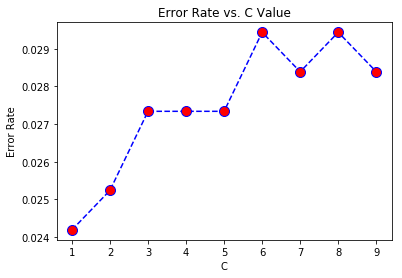

In [41]:
c=svm_error(k,10,x_train3,y_train3,x_test3,y_test3)

In [42]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9829    0.9685    0.9757       476
        male     0.9689    0.9832    0.9760       475

    accuracy                         0.9758       951
   macro avg     0.9759    0.9758    0.9758       951
weighted avg     0.9759    0.9758    0.9758       951



**3-layer Neural Network**

**Convert male to 1, female to 0**

In [43]:
voice.label = [1 if each == "male" else 0 for each in voice.label]
voice.head() # check if 1-0 conversion worked

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,...,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,0
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,...,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,0
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,...,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,0
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,...,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,0
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,...,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,0


**Extract gender (Y_data) and feature (X_data) information**

In [44]:
Y_data = voice.label.values
X_data = voice.drop(["label"], axis = 1)
X_data = (X_data - X_data.min())/(X_data.max() - X_data.min()) # normalization

print(voice.shape)
print(X_data.shape)
print(Y_data.shape)

(3168, 21)
(3168, 20)
(3168,)


In [45]:
#Split data for train and test purposes
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.3, random_state = 42)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20, 2217)
(1, 2217)
(20, 951)
(1, 951)


Create weight and bias for 3-layer neural network ( 2 hidden layers )

In [46]:
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    
    parameters = {"W1": np.random.randn(2,x_train.shape[0]) * 0.1,
                  "b1": np.zeros((2,1)),
                  "W2": np.random.randn(2,2) * 0.1,
                  "b2": np.zeros((2,1)),
                  "W3": np.random.randn(1,2) * 0.1,
                  "b3": np.zeros((1,1))}
    
    return parameters

parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

In [47]:
print(parameters["W1"].shape)
print(parameters["W2"].shape)
print(parameters["W3"].shape)

(2, 20)
(2, 2)
(1, 2)


In [48]:
print(parameters["b1"].shape)
print(parameters["b2"].shape)
print(parameters["b3"].shape)

(2, 1)
(2, 1)
(1, 1)


**Sigmoid function : sigmoid(x) = 1 / ( 1 + exp(-x) )**

In [49]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

**Forward Propogation**

In [50]:
def forward_propagation_NN(x_train, parameters):
    
    Z1 = np.dot(parameters["W1"],x_train) + parameters["b1"]
    A1 = np.tanh(Z1) # tanh is used as activation function 1
    Z2 = np.dot(parameters["W2"],A1) + parameters["b2"]
    A2 = np.tanh(Z2) # tanh is used as activation function 2
    Z3 = np.dot(parameters["W3"],A2) + parameters["b3"]
    A3 = sigmoid(Z3)

    cache = {"Z1": Z1,
             "A1": A1,
             "W1": parameters["W1"],
             "Z2": Z2,
             "A2": A2,
             "W2": parameters["W2"],
             "Z3": Z3,
             "A3": A3,
             "W3": parameters["W3"]}
    
    return A3, cache

A3, cache = forward_propagation_NN(x_train, parameters)

In [51]:
def compute_cost_NN(A3, Y, parameters):
    
    logprobs = np.multiply(np.log(A3),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    
    return cost

cost = compute_cost_NN(A3, y_train, parameters)

**Backward Propagation with Gradient Descent**

In [52]:
def backward_propagation_NN(parameters, cache, X, Y):
    
    dimension = X.shape[0] # it is 20 for our case
    dZ3 = cache["A3"] - Y # d(cost)/d(Z3)
    dW3 = 1/dimension * np.dot(dZ3,cache["A2"].T) # d(cost)/d(W3)
    db3 = 1/dimension * np.sum(dZ3, axis=1, keepdims=True) # d(cost)/d(b3)
    dZ2 = np.multiply(np.dot(dZ3.T, cache["W3"]).T , 1-np.power(cache["A2"],2)) # d(cost)/d(Z2)
    dW2 = 1/dimension * np.dot(cache["A1"], dZ2.T) # d(cost)/d(W2)
    db2 = 1/dimension * np.sum(dZ2, axis=1, keepdims=True) # d(cost)/d(b2)
    dZ1 = np.multiply(np.dot(dZ2.T, cache["W2"].T).T,1-np.power(cache["A1"],2)) # d(cost)/d(Z1)
    dW1 = 1/dimension * np.dot(dZ1, X.T) # d(cost)/d(W1)
    db1 = 1/dimension * np.sum(dZ1,axis=1, keepdims=True) # d(cost)/d(b1)
    grads = {'dW3':dW3, 
             'db3':db3,
             'dW2':dW2,
             'db2':db2,
             'dW1':dW1,
             'db1':db1}
    
    return grads

grads = backward_propagation_NN(parameters, cache, x_train, y_train)

**Set the learning rate**

In [53]:
Learning_Rate = 0.001

**Update weight and bias**

In [54]:
def update_parameters_NN(parameters, grads, learning_rate = Learning_Rate):
    parameters = {"W1": parameters["W1"]-learning_rate*grads["dW1"],
                  "b1": parameters["b1"]-learning_rate*grads["db1"],
                  "W2": parameters["W2"]-learning_rate*grads["dW2"],
                  "b2": parameters["b2"]-learning_rate*grads["db2"],
                  "W3": parameters["W3"]-learning_rate*grads["dW3"],
                  "b3": parameters["b3"]-learning_rate*grads["db3"]}
    
    return parameters

parameters = update_parameters_NN(parameters, grads, learning_rate = Learning_Rate)

**Predict for the test data with updated weight and bias (with updated parameters)**

In [55]:
def predict_NN(parameters,x_test):
    # x_test is the input for forward propagation
    A3, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(A3.shape[1]):
        if A3[0,i]<= 0.5: # if smaller than 0.5, predict it as 0
            Y_prediction[0,i] = 0
        else: # if greater than 0.5, predict it as 1
            Y_prediction[0,i] = 1

    return Y_prediction

Y_prediction = predict_NN(parameters,x_test)

**Create 3-layer Neural Network Model**

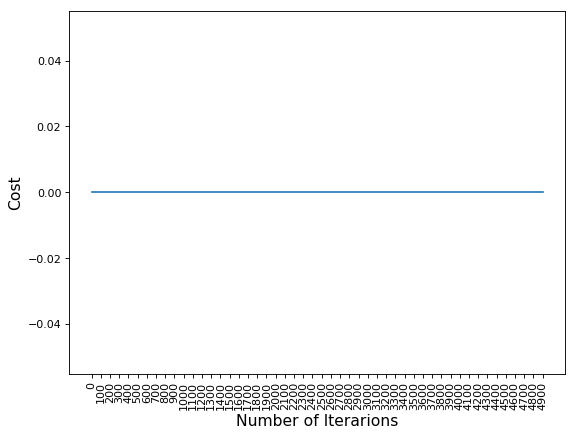

train accuracy: %100.0
test accuracy: %100.0


In [56]:
def three_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
        # forward propagation
        A3, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A3, y_train, parameters)
        # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
        # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0: # to visualize data in each 100 iteration
            cost_list.append(cost)
            index_list.append(i)

    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarions", fontsize = 14)
    plt.ylabel("Cost", fontsize = 14)
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Accuracies
    print("train accuracy: %{}".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,3)))
    print("test accuracy: %{}".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,3)))
    return parameters

parameters = three_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=5000)